# Pack Stats

In [1]:
#import pymc3 as pm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
%matplotlib inline

In [2]:
packs_raw = pd.read_csv('./1.09/MEA_Patch_1_09.csv')
packs_raw.head()

,Date,Pack,Price,Common (C/W),Uncommon (C/W),Rare Mod,Rare Weap.,Rare Char.,UR Weap.,UR Char.,1 Level booster,2 Level booster,3 Level booster,4 Level booster,N. Consumbales
0,6-Jul-17,Basic,5000,1,0,0,0,0,0,0,0,1,0,0,3
1,6-Jul-17,Basic,5000,2,0,0,0,0,0,0,1,0,0,0,2
2,6-Jul-17,Advanced,20000,0,1,0,0,0,0,0,1,0,0,0,3
3,6-Jul-17,Basic,5000,2,0,0,0,0,0,0,1,0,0,0,2
4,6-Jul-17,Basic,5000,1,0,0,0,0,0,0,1,0,0,0,3


In [3]:
list(packs_raw)

['Date',
 'Pack',
 'Price',
 'Common (C/W)',
 'Uncommon (C/W)',
 'Rare Mod',
 'Rare Weap.',
 'Rare Char.',
 'UR Weap.',
 'UR Char.',
 '1 Level booster',
 '2 Level booster',
 '3 Level booster',
 '4 Level booster',
 'N. Consumbales']

In [4]:
packs_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 15 columns):
Date               70 non-null object
Pack               70 non-null object
Price              70 non-null int64
Common (C/W)       70 non-null int64
Uncommon (C/W)     70 non-null int64
Rare Mod           70 non-null int64
Rare Weap.         70 non-null int64
Rare Char.         70 non-null int64
UR Weap.           70 non-null int64
UR Char.           70 non-null int64
1 Level booster    70 non-null int64
2 Level booster    70 non-null int64
3 Level booster    70 non-null int64
4 Level booster    70 non-null int64
N. Consumbales     70 non-null int64
dtypes: int64(13), object(2)
memory usage: 8.3+ KB


In [5]:
packs_raw_1_10 = pd.read_csv('./1.10/MEA_Patch_1_10.csv')

In [6]:
packs_raw_1_10.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 327 entries, 0 to 326
Data columns (total 15 columns):
Date               327 non-null object
Pack               327 non-null object
Price              326 non-null float64
Common (C/W)       327 non-null int64
Uncommon (C/W)     327 non-null int64
Rare Mod           327 non-null int64
Rare Weap.         327 non-null int64
Rare Char.         327 non-null int64
UR Weap.           327 non-null int64
UR Char.           327 non-null int64
1 Level booster    327 non-null int64
2 Level booster    327 non-null int64
3 Level booster    327 non-null int64
4 Level booster    327 non-null int64
N. Consumbales     327 non-null int64
dtypes: float64(1), int64(12), object(2)
memory usage: 38.4+ KB


In [7]:
packs_raw_1_10 = packs_raw_1_10[pd.notnull(packs_raw_1_10['Price'])]

In [8]:
packs_raw = packs_raw.append(packs_raw_1_10)

In [9]:
packs_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 396 entries, 0 to 326
Data columns (total 15 columns):
Date               396 non-null object
Pack               396 non-null object
Price              396 non-null float64
Common (C/W)       396 non-null int64
Uncommon (C/W)     396 non-null int64
Rare Mod           396 non-null int64
Rare Weap.         396 non-null int64
Rare Char.         396 non-null int64
UR Weap.           396 non-null int64
UR Char.           396 non-null int64
1 Level booster    396 non-null int64
2 Level booster    396 non-null int64
3 Level booster    396 non-null int64
4 Level booster    396 non-null int64
N. Consumbales     396 non-null int64
dtypes: float64(1), int64(12), object(2)
memory usage: 49.5+ KB


In [10]:
packs_raw['Pack'].value_counts()

Advanced          104
Reserves           79
Jumbo Supply       53
Expert             32
Basic              31
Premium            31
Ammo Priming       27
Supply             27
Technical Mods      5
Arsenal             3
Apex Elite          3
Jumbo Premium       1
Name: Pack, dtype: int64

In [11]:
packs_raw['Price'].value_counts()

100000.0    113
20000.0     109
10000.0      80
50000.0      32
5000.0       31
2000.0       27
0.0           3
500000.0      1
Name: Price, dtype: int64

In [12]:
packs_raw['Pack'][packs_raw['Price'] == 0]

5     Apex Elite
35    Apex Elite
91    Apex Elite
Name: Pack, dtype: object

In [13]:
packs_raw = packs_raw[packs_raw['Price'] > 0.]

In [14]:
packs_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 393 entries, 0 to 326
Data columns (total 15 columns):
Date               393 non-null object
Pack               393 non-null object
Price              393 non-null float64
Common (C/W)       393 non-null int64
Uncommon (C/W)     393 non-null int64
Rare Mod           393 non-null int64
Rare Weap.         393 non-null int64
Rare Char.         393 non-null int64
UR Weap.           393 non-null int64
UR Char.           393 non-null int64
1 Level booster    393 non-null int64
2 Level booster    393 non-null int64
3 Level booster    393 non-null int64
4 Level booster    393 non-null int64
N. Consumbales     393 non-null int64
dtypes: float64(1), int64(12), object(2)
memory usage: 49.1+ KB


In [15]:
packs_raw['Pack'].value_counts()

Advanced          104
Reserves           79
Jumbo Supply       53
Expert             32
Basic              31
Premium            31
Ammo Priming       27
Supply             27
Technical Mods      5
Arsenal             3
Jumbo Premium       1
Name: Pack, dtype: int64

In [16]:
n_premium = 0
prem_types = ['Arsenal', 'Reserves', 'Premium']
for b in prem_types:
    n_premium += len(packs_raw[packs_raw['Pack'] == b])
print('Number of "premium tier" packs =', n_premium)

prem_idx = packs_raw['Pack'] == prem_types[0]
for i in range(1, len(prem_types)):
    prem_idx |= packs_raw['Pack'] == prem_types[i]

n_ur_weap = np.sum(packs_raw[prem_idx]['UR Weap.'])
print('Number of UR weapons =', n_ur_weap)

n_ur_char = np.sum(packs_raw[prem_idx]['UR Char.'])
print('Number of UR characters =', n_ur_char)

n_ur_tot = n_ur_weap + n_ur_char
print('Number of total URs =', n_ur_tot)

n_ur_boost = np.sum(packs_raw[prem_idx]['4 Level booster'])
print('Number of UR boosters =', n_ur_boost)

Number of "premium tier" packs = 113
Number of UR weapons = 6
Number of UR characters = 18
Number of total URs = 24
Number of UR boosters = 36


Suppose the probability of a UR character is twice that of a UR weapon over this mix of packs...

(array([   5.,   26.,  262., 1141., 1195., 3213., 2827., 1156.,  169.,
           6.]),
 array([ 6. ,  7.8,  9.6, 11.4, 13.2, 15. , 16.8, 18.6, 20.4, 22.2, 24. ]),
 <a list of 10 Patch objects>)

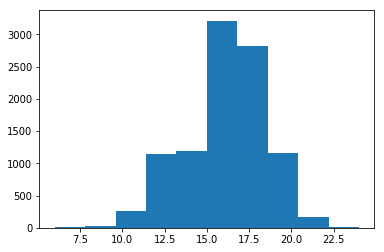

In [17]:
p_c = 0.666
p_w = 1.0 - p_c
C = stats.binom(n=n_ur_tot, p=p_c)
data = C.rvs(10000)
plt.hist(data)

In [18]:
n_ur_tot / n_premium

0.21238938053097345

In [19]:
n_expert = len(packs_raw[packs_raw['Pack'] == 'Expert'])
print('Expert packs:', n_expert)

expert_idx = packs_raw['Pack'] == 'Expert'

n_ur_weap_ex = np.sum(packs_raw[expert_idx]['UR Weap.'])
print('Number of UR weapons =', n_ur_weap_ex)

n_ur_char_ex = np.sum(packs_raw[expert_idx]['UR Char.'])
print('Number of UR characters =', n_ur_char_ex)

n_ur_tot_ex = n_ur_weap_ex + n_ur_char_ex
print('Number of total URs =', n_ur_tot_ex)

n_ur_boost_ex = np.sum(packs_raw[expert_idx]['4 Level booster'])
print('Number of UR boosters =', n_ur_boost_ex)

print('UR fraction = %f' % (n_ur_tot_ex / n_expert))

Expert packs: 32
Number of UR weapons = 1
Number of UR characters = 2
Number of total URs = 3
Number of UR boosters = 6
UR fraction = 0.093750


In [20]:
pricing_raw = packs_raw.copy()

In [21]:
type(pricing_raw)

pandas.core.frame.DataFrame

In [22]:
for col in ['Date', 'Notes', 'Variant present', 'Ultra Rares']:
    try:
        pricing_raw.drop(columns=[col], inplace=True)
    except ValueError:
        print('{} was missing'.format(col))
        
print(list(pricing_raw))

Notes was missing
Variant present was missing
Ultra Rares was missing
['Pack', 'Price', 'Common (C/W)', 'Uncommon (C/W)', 'Rare Mod', 'Rare Weap.', 'Rare Char.', 'UR Weap.', 'UR Char.', '1 Level booster', '2 Level booster', '3 Level booster', '4 Level booster', 'N. Consumbales']


In [23]:
pricing_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 393 entries, 0 to 326
Data columns (total 14 columns):
Pack               393 non-null object
Price              393 non-null float64
Common (C/W)       393 non-null int64
Uncommon (C/W)     393 non-null int64
Rare Mod           393 non-null int64
Rare Weap.         393 non-null int64
Rare Char.         393 non-null int64
UR Weap.           393 non-null int64
UR Char.           393 non-null int64
1 Level booster    393 non-null int64
2 Level booster    393 non-null int64
3 Level booster    393 non-null int64
4 Level booster    393 non-null int64
N. Consumbales     393 non-null int64
dtypes: float64(1), int64(12), object(1)
memory usage: 46.1+ KB
